In [62]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import sys  

## Basic SIR Model


In [63]:
from maxentep import SIR_model, traj_quantile

# make trajectories
N = 500
L = 60
trajs = np.empty((N, L, 3))
alphas = ss.uniform.rvs(0.01, 0.3, size=N)
betas = ss.uniform.rvs(0.01, 2, size=N)
infected = ss.beta.rvs(1, 10, size=N)
susceptible = ss.beta.rvs(5, 2, size=N)
for i, a, b, I, S in zip(range(N), alphas, betas, infected, susceptible):
    model = SIR_model([S, I, 1 - S - I], a, b, L)
    trajs[i] = model()

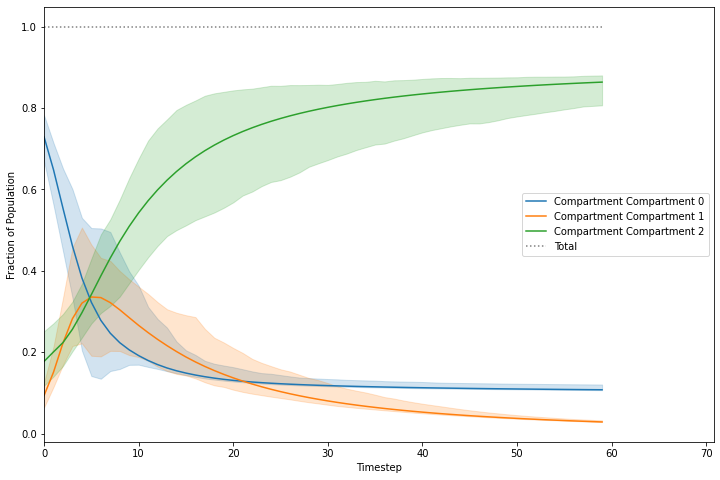

In [64]:
plt.figure(figsize=(12,8))
traj_quantile(trajs)
plt.show()

[ 0.42440658 -0.12559342]


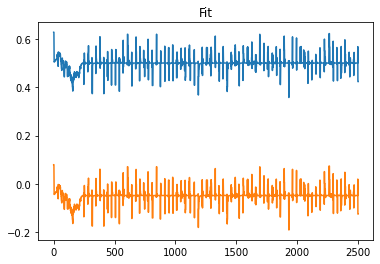

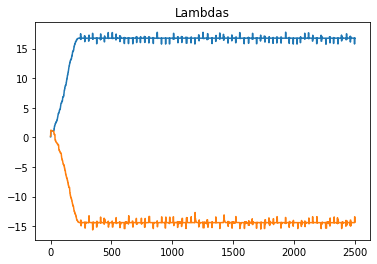

In [4]:
from maxentep import reweight_laplace
restraints = [[0.2, 0.05, 10, 1], [0.75, 0.05, 50, 2]]
ITERS = 2500
fit = np.empty((ITERS, len(restraints)))
all_lambdas = np.empty((ITERS, len(restraints)))
scales = []
def callback(i, weights, lambdas, e_gk, agreement, scale):
    all_lambdas[i, :] = lambdas
    fit[i, :] = e_gk
    scales.append(scale)
w,proc_restraints = reweight_laplace(trajs, restraints, learning_rate=1, iter=ITERS, callback=callback)
print(fit[-1])
plt.figure()
plt.title('Fit')
plt.plot(fit)
plt.show()

plt.figure()
plt.title('Lambdas')
plt.plot(all_lambdas)
plt.show()

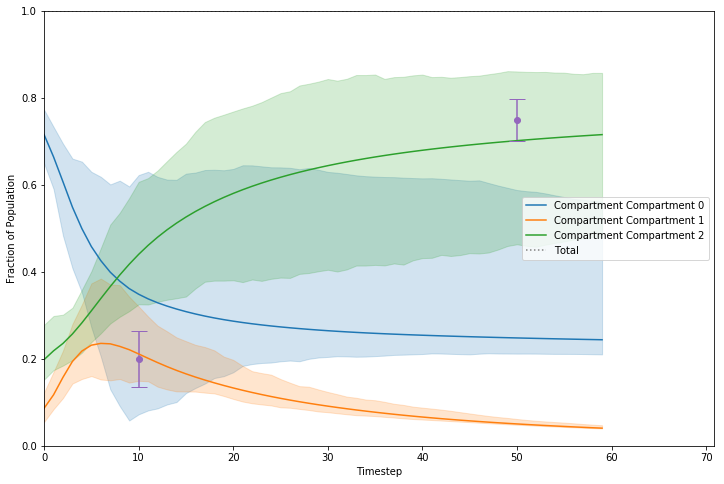

In [5]:
plt.figure(figsize=(12,8))
traj_quantile(trajs, w)
for i, (pr, r) in enumerate(zip(proc_restraints, restraints)):
    plt.plot(r[2], r[0], 'o', color='C4')
    plt.errorbar(r[2], r[0], yerr=pr.prior.expected(all_lambdas[-1][i]), color='C4', capsize=8)
plt.ylim(0,1)
plt.show()